<div style="background-color: #163eff; padding: 15px; text-align: center; display: flex; align-items: center; height: 100vh;">
    <span style="font-size: 20px; font-weight: bold; font-family: 'Times New Roman'; color: white; margin: auto;">
        Sentiment Analysis of Public Comments Ahead of The 2024 Elections in Indonesia 
    </span>
</div>

## Import Package

In [1]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import string

from wordcloud import WordCloud
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_colwidth', None)

C:\Users\ILHAM RAMADHAN\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


## Cleaned Data

In [2]:
data = pd.read_excel("Data_sample_fix.xlsx")

In [3]:
data['cleaned_text'] = data['cleaned_text'].astype(str)

# Tokenization
data['tokens'] = data['cleaned_text'].apply(word_tokenize)

# Remove stop words
# Filtering (Removing Stopword)
stop_words = set(stopwords.words('indonesian'))

# Stopword Tambahan
additional_stop_words = set(["ada", "adalah", "adanya", "adapun", "agak", "agaknya", "agar", "akan", "akankah", "akhir",
    "akhiri", "akhirnya", "aku", "akulah", "amat", "amatlah", "anda", "andalah", "antar",
    "antara", "antaranya", "apa", "apaan", "apabila", "apakah", "apalagi", "apatah", "artinya",
    "asal", "asalkan", "atas", "atau", "ataukah", "ataupun", "awal", "awalnya", "bagai",
    "bagaikan", "bagaimana", "bagaimanakah", "bagaimanapun", "bagi", "bagian", "bahkan",
    "bahwa", "bahwasanya", "baik", "bakal", "bakalan", "balik", "banyak", "bapak", "baru",
    "bawah", "beberapa", "begini", "beginian", "beginikah", "beginilah", "begitu",
    "begitukah", "begitulah", "begitupun", "bekerja", "belakang", "belakangan", "belum",
    "belumlah", "benar", "benarkah", "benarlah", "berada", "berakhir", "berakhirlah",
    "berakhirnya", "berapa", "berapakah", "berapalah", "berapapun", "berarti", "berawal",
    "berbagai", "berdatangan", "beri", "berikan", "berikut", "berikutnya", "berjumlah",
    "berkali-kali", "berkata", "berkehendak", "berkeinginan", "berkenaan", "berlainan",
    "berlalu", "berlangsung", "berlebihan", "bermacam", "bermacam-macam", "bermaksud",
    "bermula", "bersama", "bersama-sama", "bersiap", "bersiap-siap", "bertanya",
    "bertanya-tanya", "berturut", "berturut-turut", "bertutur", "berujar", "berupa",
    "besar", "betul", "betulkah", "biasa", "biasanya", "bila", "bilakah", "bisa", "bisakah",
    "boleh", "bolehkah", "bolehlah", "buat", "bukan", "bukankah", "bukanlah", "bukannya",
    "bulan", "bung", "cara", "caranya", "cukup", "cukupkah", "cukuplah", "cuma", "dahulu",
    "dalam", "dan", "dapat", "dari", "daripada", "datang", "dekat", "demi", "demikian",
    "demikianlah", "dengan", "depan", "di", "dia", "diakhiri", "diakhirinya", "dialah",
    "diantara", "diantaranya", "diberi", "diberikan", "diberikannya", "dibuat", "dibuatnya",
    "didapat", "didatangkan", "digunakan", "diibaratkan", "diibaratkannya", "diingat",
    "diingatkan", "diinginkan", "dijawab", "dijelaskan", "dijelaskannya", "dikarenakan", "dikatakan", "dikatakannya", "dikerjakan", "diketahui",
    "diketahuinya", "dikira", "dilakukan", "dilalui", "dilihat", "dimaksud", "dimaksudkan",
    "dimaksudkannya", "dimaksudnya", "diminta", "dimintai", "dimisalkan", "dimulai",
    "dimulailah", "dimulainya", "dimungkinkan", "dini", "dipastikan", "diperbuat",
    "diperbuatnya", "dipergunakan", "diperkirakan", "diperlihatkan", "diperlukan",
    "diperlukannya", "dipersoalkan", "dipertanyakan", "dipunyai", "diri", "dirinya",
    "disampaikan", "disebut", "disebutkan", "disebutkannya", "disini", "disinilah",
    "ditambahkan", "ditandaskan", "ditanya", "ditanyai", "ditanyakan", "ditegaskan",
    "ditujukan", "ditunjuk", "ditunjuki", "ditunjukkan", "ditunjukkannya", "ditunjuknya",
    "dituturkan", "dituturkannya", "diucapkan", "diucapkannya", "diungkapkan", "dong",
    "dua", "dulu", "empat", "enggak", "enggaknya", "entah", "entahlah", "guna", "gunakan",
    "hal", "hampir", "hanya", "hanyalah", "hari", "harus", "haruslah", "harusnya",
    "hendak", "hendaklah", "hendaknya", "hingga", "ia", "ialah", "ibarat", "ibaratkan",
    "ibaratnya", "ibu", "ikut", "ingat", "ingat-ingat", "ingin", "inginkah", "inginkan",
    "ini", "inikah", "inilah", "itu", "itukah", "itulah", "jadi", "jadilah", "jadinya",
    "jangan", "jangankan", "janganlah", "jauh", "jawab", "jawaban", "jawabnya", "jelas",
    "jelaskan", "jelaslah", "jelasnya", "jika", "jikalau", "juga", "jumlah", "jumlahnya",
    "justru", "kala", "kalau", "kalaulah", "kalaupun", "kalian", "kami", "kamilah", "kamu",
    "kamulah", "kan", "kapan", "kapankah", "kapanpun", "karena", "karenanya", "kasus",
    "kata", "katakan", "katakanlah", "katanya", "ke", "keadaan", "kebetulan", "kecil",
    "kedua", "keduanya", "keinginan", "kelamaan", "kelihatan", "kelihatannya", "kelima", "keluar", "kembali", "kemudian", "kemungkinan",
    "kemungkinannya", "kenapa", "kepada", "kepadanya", "kesampaian", "keseluruhan",
    "keseluruhannya", "keterlaluan", "ketika", "khususnya", "kini", "kinilah", "kira",
    "kira-kira", "kiranya", "kita", "kitalah", "kok", "kurang", "lagi", "lagian", "lah",
    "lain", "lainnya", "lalu", "lama", "lamanya", "lanjut", "lanjutnya", "lebih", "lewat",
    "lima", "luar", "macam", "maka", "makanya", "makin", "malah", "malahan", "mampu",
    "mampukah", "mana", "manakala", "manalagi", "masa", "masalah", "masalahnya", "masih",
    "masihkah", "masing", "masing-masing", "mau", "maupun", "melainkan", "melakukan",
    "melalui", "melihat", "melihatnya", "memang", "memastikan", "memberi", "memberikan",
    "membuat", "memerlukan", "memihak", "meminta", "memintakan", "memisalkan",
    "memperbuat", "mempergunakan", "memperkirakan", "memperlihatkan", "mempersiapkan",
    "mempersoalkan", "mempertanyakan", "mempunyai", "memulai", "memungkinkan", "menaiki",
    "menambahkan", "menandaskan", "menanti", "menanti-nanti", "menantikan", "menanya",
    "menanyai", "menanyakan", "mendapat", "mendapatkan", "mendatang", "mendatangi",
    "mendatangkan", "menegaskan", "mengakhiri", "mengapa", "mengatakan", "mengatakannya",
    "mengenai", "mengerjakan", "mengetahui", "menggunakan", "menghendaki", "mengibaratkan",
    "mengibaratkannya", "mengingat", "mengingatkan", "menginginkan", "mengira",
    "mengucapkan", "mengucapkannya", "mengungkapkan", "menjadi", "menjawab", "menjelaskan",
    "menuju", "menunjuk", "menunjuki", "menunjukkan", "menunjuknya", "menurut",
    "menuturkan", "menyampaikan", "menyangkut", "menyatakan", "menyebutkan", "menyeluruh", "menyiapkan", "merasa",
    "mereka", "merekalah", "merupakan", "meski", "meskipun", "meyakini", "meyakinkan",
    "minta", "mirip", "misal", "misalkan", "misalnya", "mula", "mulai", "mulailah", "mulanya",
    "mungkin", "mungkinkah", "nah", "naik", "namun", "nanti", "nantinya", "nyaris", "nyatanya",
    "oleh", "olehnya", "pada", "padahal", "padanya", "pak", "paling", "panjang", "pantas",
    "para", "pasti", "pastilah", "penting", "pentingnya", "per", "percuma", "perlu", "perlukah",
    "perlunya", "pernah", "persoalan", "pertama", "pertama-tama", "pertanyaan", "pertanyakan",
    "pihak", "pihaknya", "pukul", "pula", "pun", "punya", "rasa", "rasanya", "rata", "rupanya",
    "saat", "saatnya", "saja", "sajalah", "saling", "sama", "sama-sama", "sambil", "sampai",
    "sampai-sampai", "sampaikan", "sana", "sangat", "sangatlah", "satu", "saya", "sayalah", "se",
    "sebab", "sebabnya", "sebagai", "sebagaimana", "sebagainya", "sebagian", "sebaik",
    "sebaik-baiknya", "sebaiknya", "sebaliknya", "sebanyak", "sebegini", "sebegitu", "sebelum",
    "sebelumnya", "sebenarnya", "seberapa", "sebesar", "sebetulnya", "sebisanya", "sebuah",
    "sebut", "sebutlah", "sebutnya", "secara", "secukupnya", "sedang", "sedangkan", "sedemikian",
    "sedikit", "sedikitnya", "seenaknya", "segala", "segalanya", "segera", "seharusnya", "sehingga",
    "seingat", "sejak", "sejauh", "sejenak", "sejumlah", "sekadar", "sekadarnya", "sekali",
    "sekali-kali", "sekalian", "sekaligus", "sekalipun", "sekarang", "sekarang", "sekecil",
    "seketika", "sekiranya", "sekitar", "sekitarnya", "sekurang-kurangnya", "sekurangnya",
    "sela", "selain", "selaku", "selalu", "selama", "selama-lamanya", "selamanya", "selanjutnya",
    "seluruh", "seluruhnya", "semacam", "semakin", "semampu", "semampunya", "semasa", "semata",
    "semata-mata", "semaunya", "sementara", "semisal", "semisalnya", "sempat", "semua", "semuanya",
    "semula", "sendiri", "sendirian", "sendirinya", "seolah", "seolah-olah", "seorang", "sepanjang", "sepantasnya", "sepantasnyalah", "seperlunya", "seperti", "sepertinya", "sepihak",
    "sering", "seringnya", "serta", "serupa", "sesaat", "sesama", "sesampai", "sesegera",
    "sesekali", "seseorang", "sesuatu", "sesuatunya", "sesudah", "sesudahnya", "setelah",
    "setempat", "setengah", "seterusnya", "setiap", "setiba", "setibanya", "setidak-tidaknya",
    "setidaknya", "setinggi", "seusai", "sewaktu", "siap", "siapa", "siapakah", "siapapun",
    "sini", "sinilah", "soal", "soalnya", "suatu", "sudah", "sudahkah", "sudahlah", "supaya",
    "tadi", "tadinya", "tahu", "tahun", "tak", "tambah", "tambahnya", "tampak", "tampaknya",
    "tandas", "tandasnya", "tanpa", "tanya", "tanyakan", "tanyanya", "tapi", "tegas", "tegasnya",
    "telah", "tempat", "tengah", "tentang", "tentu", "tentulah", "tentunya", "tepat", "terakhir",
    "terasa", "terbanyak", "terdahulu", "terdapat", "terdiri", "terhadap", "terhadapnya", "teringat",
    "teringat-ingat", "terjadi", "terjadilah", "terjadinya", "terkira", "terlalu", "terlebih", "terlihat",
    "termasuk", "ternyata", "tersampaikan", "tersebut", "tersebutlah", "tertentu", "tertuju", "terus",
    "terutama", "tetap", "tetapi", "tiap", "tiba", "tiba-tiba", "tidak", "tidakkah", "tidaklah",
    "tiga", "tinggi", "toh", "tunjuk", "turut", "tutur", "tuturnya", "ucap", "ucapnya", "ujar",
    "ujarnya", "umum", "umumnya", "ungkap", "ungkapnya", "untuk", "usah", "usai", "waduh", "wah",
    "wahai", "waktu", "waktunya", "walau", "walaupun", "wong", "yaitu", "yakin", "yakni", "yang",
    "atau", "ada", "adalah", "adanya",  "agar", "akan", "aku", "anda", "antara", "apa", "apabila", "apakah", "apalagi", "atas",
    "adapun", "agaknya", "akan", "akankah", "akhirnya", "akulah", "amat", "amatlah", "andalah",
    "antar", "antaranya", "ataukah", "ataupun", "bagaimana", "bagi", "bahkan", "bahwa", "baik",
    "banyak", "baru", "beberapa", "belum", "berapa", "berbagai", "bersama", "bila", "bisa",
    "bagai", "bagaikan", "bagaimanakah", "bagaimanapun", "bahwasanya", "beginikah", "beginilah",
    "begitu", "begini", "begitukah", "begitulah", "begitupun", "belumlah", "berapakah", "berapalah",
    "berapapun", "bermacam", "betulkah", "biasa", "biasanya", "bilakah", "bisakah", "bolehlah",
    "bolekah", "buat", "bukannya", "bukankah", "bukanlah", "contohnya", "cukup", "cuma", "dan",
    "dapat", "dari", "daripada", "demikian", "demikianlah", "dengan", "di", "dia", "dilakukan",
    "dalam", "dahulu", "dekat", "demi", "depan", "dialah", "diantaranya", "diantara", "dikarenakan",
    "dini", "diri", "dirinya", "dulu", "entah", "entahlah", "hal", "hanya", "harus", "hingga",
    "hanyalah", "haruslah", "harusnya", "hendak", "hendaklah", "hendaknya", "ia", "ini", "itu",
    "ialah", "itulah", "ibarat", "ingin", "inginkah", "inginkan", "inikah", "inilah", "itukah",
    "jadi", "juga", "jika", "jikalau", "jangan", "janganlah", "jangankan", "justru", "kalau",
    "kita", "kali", "kami", "kamu", "kapan", "karena", "kata", "katanya", "kau", "ke", "kembali",
    "kemudian", "kepada", "ketika", "kini", "kala", "kalaulah", "kalaupun", "kalian", "kamilah",
    "kamulah", "kapankah", "kapanpun",   "karenanya", "kecil", "kenapa", "kepadanya", "khususnya", "kinilah", "kiranya", "kitalah",
    "kok", "lagi", "lama", "lain", "lainnya", "lalu", "langsung", "lebih", "luar", "lainnya",
    "lamanya", "maka", "malah", "mana", "masih", "maupun", "melalui", "memang", "mengapa",
    "mengatakan", "mengenai", "menjadi", "menurut", "menyatakan", "mereka", "merupakan", "meski",
    "meskipun", "misalnya", "mulai", "macam", "makanya", "makin", "malahan", "mampu", "mampukah",
    "manakala", "manalagi", "masihkah", "masing", "mau", "melainkan", "merekalah", "mungkin",
    "mungkinlah", "namun", "nah", "nanti", "nantinya", "nyaris", "oleh", "olehnya", "pada", "padahal",
    "paling", "papar", "paparnya", "para", "per", "perlu", "pernah", "pula", "pun", "padanya", "pantas",
    "pasti", "pastilah", "percuma", "rupanya", "saat", "saja", "salah", "saling", "sama", "sampai",
    "sangat", "saya", "seandainya", "sebab", "sebagai", "sebelum", "sebuah", "secara", "sedang",
    "sedangkan", "sehingga", "sejak", "sejumlah", "sekarang", "sekitar", "selain", "selama", "sementara",
    "semua", "sendiri", "seorang", "seperti", "serta", "seseorang", "sesuatu", "setelah", "setiap",
    "suatu", "sudah", "saatnya", "sajalah", "sambil", "sana", "sangatlah", "sayalah", "sebabnya",
    "sebagaimana", "sebagainya", "sebaliknya", "sebanyak", "sebegini", "sebegitu", "sebelumnya",
    "sebenarnya", "seberapa", "sebetulnya", "sebisanya", "sedemikian", "sedikit", "sedikitnya",
    "segala", "segalanya", "segera", "seharusnya", "sejenak", "sekali", "sekalian", "sekaligus", "sekalipun", "seketika",
    "sekiranya", "sekitarnya", "sela", "selagi", "selaku", "selalu", "selamanya", "seluruhnya",
    "semacam", "semakin", "semasih", "semaunya", "sempat", "semuanya", "semula", "sendirinya",
    "seolah", "sepanjang", "sepantasnya", "sepantasnyalah", "sepertinya", "sering", "seringnya",
    "serupa", "sesaat", "sesama", "sesegera", "sesekali", "seseorang", "sesuatunya", "sesudah",
    "sesudahnya", "setelah", "seterusnya", "setidaknya", "sewaktu", "siapa", "siapakah", "siapapun",
    "sini", "sinilah", "sudahkah", "sudahlah", "supaya", "tak", "tidak", "tandas", "tandasnya",
    "tanpa", "tapi", "telah", "tempat", "tentang", "terhadap", "terjadi", "termasuk", "ternyata",
    "tersebut", "terus", "tetap", "tetapi", "tadi", "tadinya", "tentu", "tentulah", "tentunya",
    "terdiri", "terhadapnya", "terlalu", "terlebih", "tersebutlah", "tertentu", "tiap", "tidakkah",
    "tidaklah", "ujar", "ujarnya", "untuk", "walaupun", "yaitu", "yakni", "yang", "ya", "waduh",
    "wah", "wahai", "walau", "wakil", "waktu", "waktunya", "wanita", "warga", "warta", "wib",
    "wilayah", "rt", "adalah", "adapun", "agaknya", "akan", "akhir", "akhirnya", "akulah", "amatlah",
    "andalah", "antara", "apa", "apabila", "apalagi", "artinya", "asalkan", "atau", "ataupun",
    "awalnya", "bagaikan", "bagaimanakah", "bagi", "bahkan", "bahwasanya", "bakal", "balik", "bapak",
    "bawah", "begini", "beginikah", "begitu", "begitulah", "bekerja", "belakangan", "belumlah",
    "benarkah", "berada", "berakhirlah", "berapa", "berapalah", "berarti", "berbagai", "beri",
    "berikut", "berjumlah", "berkata",  "berkeinginan", "berlainan", "berlangsung", "bermacam", "bermaksud", "bersama", "bersiap",
    "bertanya", "berturut", "bertutur", "berupa", "betul", "biasa", "bila", "bisa", "boleh",
    "bolehlah", "bukan", "bukanlah", "bulan", "cara", "cukup", "cukuplah", "dahulu", "dan",
    "dari", "datang", "demi", "demikianlah", "depan", "dia", "diakhirinya", "diantara", "diberi",
    "diberikannya", "dibuatnya", "didatangkan", "diibaratkan", "diingat", "diinginkan", "dijelaskan",
    "dikarenakan", "dikatakannya", "diketahui", "dikira", "dilalui", "dimaksud", "dimaksudkannya",
    "diminta", "dimisalkan", "dimulailah", "dimungkinkan", "dipastikan", "diperbuatnya", "diperkirakan",
    "diperlukan", "dipersoalkan", "dipunyai", "dirinya", "disebut", "disebutkannya", "disinilah",
    "ditandaskan", "ditanyai", "ditegaskan", "ditunjuk", "ditunjukkan", "ditunjuknya", "dituturkannya",
    "diucapkannya", "dong", "dulu", "enggak", "entah", "guna", "hal", "hanya", "hari", "haruslah",
    "hendak", "hendaknya", "ia", "ibarat", "ibaratnya", "ikut", "ingat-ingat", "inginkah", "ini",
    "inilah", "itukah", "jadi", "jadinya", "jangankan", "jauh", "jawaban", "jelas", "jelaslah", "jika",
    "juga", "jumlahnya", "kala", "kalaulah", "kalian", "kamilah", "kamulah", "kapan", "kapanpun",
    "karenanya", "kata", "katakanlah", "ke", "kebetulan", "kedua", "keinginan", "kelihatan", "kelima",
    "kembali", "kemungkinan", "kenapa", "kepadanya", "keseluruhan", "keterlaluan", "khususnya", "kinilah",
    "kira-kira", "kita", "kok", "lagi", "lah", "lainnya", "lama", "lanjut", "lebih", "lima", "macam",
    "makanya", "malah", "mampu", "mana", "manalagi", "masalah",   "masih", "masing", "mau", "melainkan", "melalui", "melihatnya", "memastikan", "memberikan",
    "memerlukan", "meminta", "memisalkan", "mempergunakan", "memperlihatkan", "mempersoalkan",
    "mempunyai", "memungkinkan", "menambahkan", "menanti", "menantikan", "menanyai", "mendapat",
    "mendatang", "mendatangkan", "mengakhiri", "mengatakan", "mengenai", "mengetahui", "menghendaki",
    "mengibaratkannya", "mengingatkan", "mengira", "mengucapkannya", "menjadi", "menjelaskan",
    "menunjuk", "menunjukkan", "menurut", "menyampaikan", "menyatakan", "menyeluruh", "merasa",
    "merekalah", "meski", "meyakini", "minta", "misal", "misalnya", "mulai", "mulanya", "mungkinkah",
    "naik", "nanti", "nyaris", "oleh", "pada", "padanya", "paling", "pantas", "pasti", "penting",
    "per", "perlu", "perlunya", "persoalan", "pertama-tama", "pertanyakan", "pihaknya", "pula", "punya",
    "rasanya", "rupanya", "saatnya", "sajalah", "sama", "sambil", "sampai-sampai", "sana", "sangatlah",
    "saya", "se", "sebabnya", "sebagaimana", "sebagian", "sebaik-baiknya", "sebaliknya", "sebegini",
    "sebelum", "sebenarnya", "sebesar", "sebisanya", "sebut", "sebutnya", "secukupnya", "sedangkan",
    "sedikit", "seenaknya", "segalanya", "seharusnya", "seingat", "sejauh", "sejumlah", "sekadarnya",
    "sekali-kali", "sekaligus", "sekarang", "sekecil", "sekiranya", "sekitarnya", "sekurangnya", "selain",
    "selalu", "selama-lamanya", "selanjutnya", "seluruhnya", "semakin", "semampunya", "semasih",
    "semata-mata", "sementara", "semisalnya", "semua", "semula", "sendirian", "seolah", "seorang",
    "sepantasnya", "seperlunya", "sepertinya", "sering", "serta", "sesaat", "sesampai", "sesekali", "sesuatu",  "sesudah", "setelah", "setengah", "setiap", "setibanya", "setidaknya", "seusai", "siap",
    "siapakah", "sini", "soal", "suatu", "sudahkah", "supaya", "tadinya", "tahun", "tambah",
    "tampak", "tandas", "tanpa", "tanyakan", "tapi", "tegasnya", "tempat", "tentang", "tentulah",
    "tepat", "terasa", "terdahulu", "terdiri", "terhadapnya", "teringat-ingat", "terjadilah",
    "terkira", "terlebih", "termasuk", "tersampaikan", "tersebutlah", "tertuju", "terutama",
    "tetapi", "tiba", "tidak", "tidaklah", "tinggi", "tunjuk", "tutur", "ucap", "ujar", "umum",
    "ungkap", "untuk", "usai", "wah", "waktu", "walau", "wong", "yakin", "yang", "ada", "adanya",
    "anda", "apakah", "atas", "akankah", "antar", "ataukah", "bagaimana", "baik", "baru", "belum",
    "bagai", "beginilah", "bilakah", "buat", "bukankah", "contohnya", "cuma", "dapat", "daripada",
    "di", "dilakukan", "dialah", "dini", "harus", "hanyalah", "harusnya", "hendaklah", "itu",
    "itulah", "ingin", "inginkan", "jangan", "kalau", "kali", "kamu", "karena", "katanya", "kemudian",
    "ketika", "kalaupun", "kapankah", "kiranya", "langsung", "luar", "lamanya", "mengapa", "mereka",
    "makin", "manakala",  "masihkah", "mungkinlah", "nah", "nantinya", "paparnya", "pernah", "pun", "pastilah",
    "saja", "saling", "sampai", "sebab", "secara", "sejak", "sendiri", "seperti", "seseorang",
    "sebagainya", "sebanyak", "sebegitu", "sebetulnya", "sedemikian", "sedikitnya", "sekali",
    "seketika", "selagi", "semaunya", "semuanya", "sendirinya", "sepanjang", "sepantasnyalah",
    "serupa", "sesama", "sesuatunya", "sesudahnya", "seterusnya", "sewaktu", "tandasnya",
    "terhadap", "tersebut", "tetap", "tadi", "tentu", "tentunya", "tertentu", "tidakkah",
    "yaitu", "waduh", "wahai", "wakil", "waktunya", "warga", "wib", "rt", "no", "nyatanya",
    "olehnya", "padahal", "pak", "panjang", "para", "pentingnya", "percuma", "perlukah",
    "pertama", "pertanyaan", "pihak", "pukul", "rasa", "rata", "saat", "sama-sama", "sampaikan",
    "sangat", "satu", "sayalah", "sebagai", "sebaik", "sebaiknya", "sebelumnya", "seberapa",
    "sebuah", "sebutlah", "sedang", "segala", "segera", "sehingga", "sejenak", "sekadar",
    "sekalian", "sekalipun", "sekitar", "sekurang-kurangnya", "sela", "selaku", "selama",
    "selamanya", "seluruh", "semacam", "semampu", "semasa", "semata", "semisal", "sempat",
    "seolah-olah", "sepihak", "seringnya", "sesegera", "setempat", "setiba", "setidak-tidaknya",  "setinggi", "siapa", "siapapun", "sinilah", "soalnya", "sudah", "sudahlah", "tahu", "tak",
    "tambahnya", "tampaknya", "tanya", "tanyanya", "tegas", "telah", "tengah", "terakhir", "terbanyak",
    "terdapat", "teringat", "terjadi", "terjadinya", "terlalu", "terlihat", "ternyata", "terus", "tiap",
    "tiba-tiba", "tiga", "toh", "turut", "tuturnya", "ucapnya", "ujarnya", "umumnya", "ungkapnya", "usah",
    "waktunya", "walaupun", "yakni", "dengan", "orang", "bahwa", "namun", "dua", "kepada", "lalu", "lain",
    "banyak", "beberapa", "besar", "merupakan", "agar", "persen", "wib", "diri", "minggu", "the", "selasa",
    "jumlah", "kondisi", "hubungan", "acara", "masa", "hidup", "senin", "maupun", "mantan", "jenis", "juni",
    "tinggal", "asal", "sesuai", "berat", "memberi", "sabtu", "mencari", "ruang", "biasanya", "berdasarkan",
    "pekan", "membawa", "tingkat", "dekat", "ketiga", "ribu", "membantu", "khusus", "ditemukan", "kegiatan",
    "tampil", "bertemu", "justru", "menyebutkan", "milik", "menjalani", "sumber", "upaya", "mengambil", "lewat",
    "meningkatkan", "kehidupan", "penggunaan", "menghadapi", "aku", "kami", "beliau", "lo", "lu", "kemana",
    "gimana", "kurang", "kemarin", "yg", "ya", "emang", "gitu", "amat", "sekian", "sekedar", "&", "telanjur",
    "dimana", "kah", "kecuali", "seraya", "dsb", "dll", "dulunya", "demikian", "nggak", "oh", "tolong", "bagaimanapun",
    "p","ngk","di","12","utk","aja","nya","gk","ga","tdk","bro","sih","dg","ngga","klo","tp","tau",
    "org","dgn", "jd","gw", "si","jg","skrg", "gua", "krn", "tpi", "nih","gak","kalo","bilang","tp","sdh","dr","jgn","udah"
])


def filter_stopwords(tokens):
    filtered_tokens = [word for word in tokens if word not in stop_words and word not in additional_stop_words]
    return filtered_tokens


data['filtered_tokens'] = data['tokens'].apply(filter_stopwords)

# Stemming (optional, using Sastrawi)
factory = StemmerFactory()
stemmer = factory.create_stemmer()
data['stemmed_tokens'] = data['filtered_tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

# Tidy text
data['Tidy_Stemmed_Tokens'] = data['stemmed_tokens'].apply(lambda tokens: ' '.join(tokens))

In [4]:
data['Validasi'] = data['Validasi'].replace({'positif': 'Positive', 'negatif': 'Negative', 'neutral': 'Neutral'})

## Model Sentiment Analysis: BERT

In [5]:
data1 = data.copy()
data2 = data.copy()
data3 = data.copy()

In [6]:
import numpy as np
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
import torch
import scipy

import time

pretrained = "mdhugol/indonesia-bert-sentiment-classification"
model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
label_index = {'LABEL_0': 'Positive', 'LABEL_1': 'Neutral', 'LABEL_2': 'Negative'}

label0 = []
label1 = []
label2 = []

for i in data1.index:
  inputs = tokenizer(data1['full_text'][i], return_tensors="pt", max_length=512)
  with torch.no_grad():
    logits = model(**inputs).logits
  scores = {k: v for k, v in zip(model.config.id2label.values(), scipy.special.softmax(logits.numpy().squeeze()))}
  label0.append(scores.get('LABEL_0'))
  label1.append(scores.get('LABEL_1'))
  label2.append(scores.get('LABEL_2'))


data1['Positive'] = label0
data1['Neutral'] = label1
data1['Negative'] = label2

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [7]:
data1['Sentiment_Bert'] = data1[['Positive', 'Neutral', 'Negative']].idxmax(axis=1)

In [8]:
data1['Sentimen_Score'] = data1[["Positive", "Neutral", "Negative"]].max(axis=1)

In [9]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(data1['Validasi'], data1['Sentiment_Bert'])

print(f'Akurasi Sentiment Bert: {accuracy * 100:.2f}%')

Akurasi Sentiment Bert: 73.18%


In [10]:
from sklearn.metrics import classification_report

report = classification_report(data1['Validasi'], data1['Sentiment_Bert'])
print("Classification Report BERT:\n", report)

Classification Report BERT:
               precision    recall  f1-score   support

    Negative       0.66      0.86      0.75       118
     Neutral       0.77      0.62      0.69       144
    Positive       0.78      0.73      0.75       137

    accuracy                           0.73       399
   macro avg       0.74      0.74      0.73       399
weighted avg       0.74      0.73      0.73       399



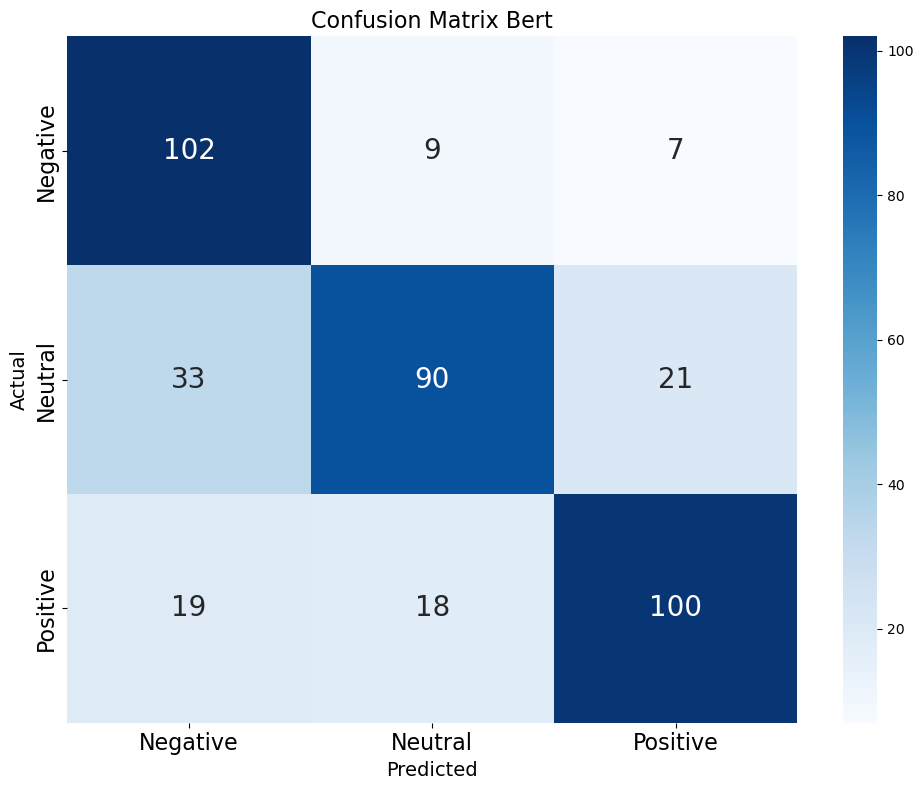

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data1['Validasi'] contains true labels and data1['Sentiment_Bert'] contains predicted labels
y_true = data1['Validasi']
y_pred = data1['Sentiment_Bert']

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))  # Set larger figure size for better visibility
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'], annot_kws={'size': 20})
plt.title('Confusion Matrix Bert', fontsize=16)  # Increase title font size
plt.xlabel('Predicted', fontsize=14)  # Increase x-axis label font size
plt.ylabel('Actual', fontsize=14)  # Increase y-axis label font size
plt.xticks(fontsize=16)  # Increase x-axis tick font size
plt.yticks(fontsize=16)  # Increase y-axis tick font size
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('confusion_matrix_BERT.png', dpi=1500)  # Save the plot with higher resolution (1200 DPI)
plt.show()

## Model Sentiment Analysis: TEXTBLOB

In [12]:
from textblob import TextBlob
from sklearn.metrics import accuracy_score

def predict_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.1:
        return 'Positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'
    
data2['Sentiment_TextBlob'] = data2['Tidy_Stemmed_Tokens'].apply(predict_sentiment)
data2['Polarity_Score'] = data2['Tidy_Stemmed_Tokens'].apply(lambda x: TextBlob(x).sentiment.polarity)
accuracy = accuracy_score(data2['Validasi'], data2['Sentiment_TextBlob'])

print("Accuracy:", accuracy)

Accuracy: 0.37092731829573933


In [13]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(data2['Validasi'], data2['Sentiment_TextBlob'])

print(f'Akurasi Sentiment TextBlob: {accuracy * 100:.2f}%')

Akurasi Sentiment TextBlob: 37.09%


In [14]:
report = classification_report(data2['Validasi'], data2['Sentiment_TextBlob'])
print("Classification Report Textblob:\n", report)

# Save the classification report to a text file
with open("classification_report_textblob.txt", "w") as file:
    file.write("Classification Report Textblob:\n")
    file.write(report)

Classification Report Textblob:
               precision    recall  f1-score   support

    Negative       1.00      0.02      0.03       118
     Neutral       0.37      0.96      0.53       144
    Positive       0.38      0.06      0.10       137

    accuracy                           0.37       399
   macro avg       0.58      0.34      0.22       399
weighted avg       0.56      0.37      0.24       399



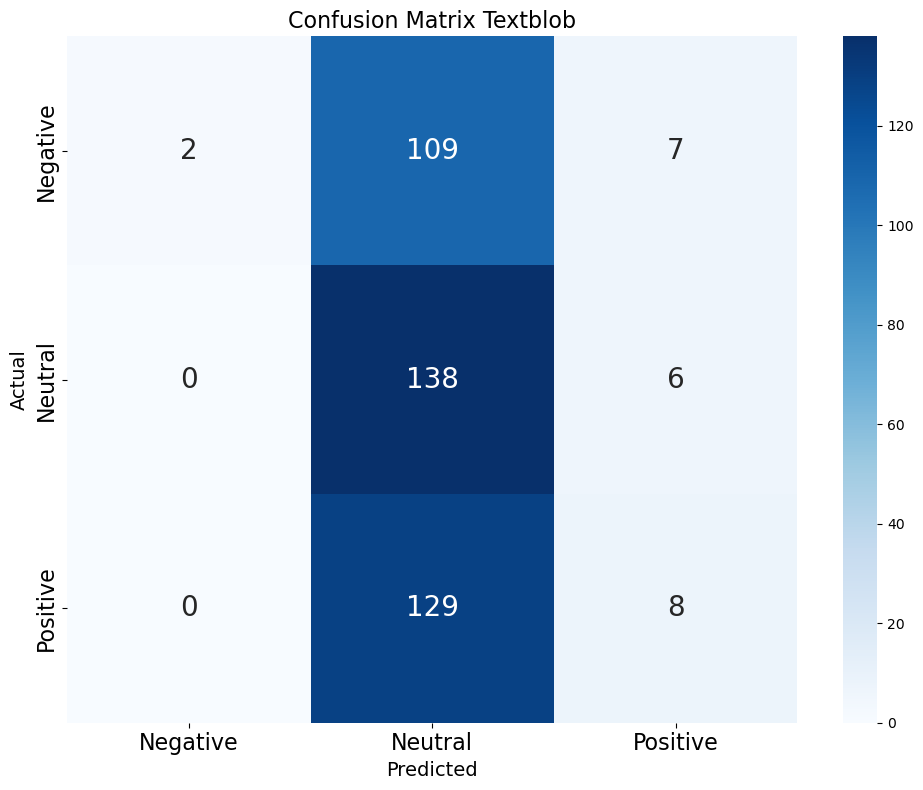

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data1['Validasi'] contains true labels and data1['Sentiment_Bert'] contains predicted labels
y_true2 = data2['Validasi']
y_pred2 = data2['Sentiment_TextBlob']

# Calculate confusion matrix
cm2 = confusion_matrix(y_true2, y_pred2)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))  # Set larger figure size for better visibility
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'], annot_kws={'size': 20})
plt.title('Confusion Matrix Textblob', fontsize=16)  # Increase title font size
plt.xlabel('Predicted', fontsize=14)  # Increase x-axis label font size
plt.ylabel('Actual', fontsize=14)  # Increase y-axis label font size
plt.xticks(fontsize=16)  # Increase x-axis tick font size
plt.yticks(fontsize=16)  # Increase y-axis tick font size
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('confusion_matrix_Textblob.png', dpi=1500)  # Save the plot with higher resolution (1200 DPI)
plt.show()

## Model Sentiment Analysis: VADER

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score

def predict_sentiment_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    compound_score = analyzer.polarity_scores(text)['compound']
    
    if compound_score > 0:
        return 'Positive'
    elif compound_score < 0:
        return 'Negative'
    else:
        return 'Neutral'
    

data3['Sentiment_Vader'] = data3['Tidy_Stemmed_Tokens'].apply(predict_sentiment_vader)
data3['compound_Score'] = data3['Tidy_Stemmed_Tokens'].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x)['compound'])
accuracy_vader = accuracy_score(data3['Validasi'], data3['Sentiment_Vader'])

print("Accuracy:", accuracy_vader)
print(f"Accuracy: {accuracy_vader * 100:.2f}%")

Accuracy: 0.38345864661654133
Accuracy: 38.35%


In [17]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(data3['Validasi'], data3['Sentiment_Vader'])

print(f'Akurasi Sentiment Label: {accuracy * 100:.2f}%')

Akurasi Sentiment Label: 38.35%


In [18]:
report = classification_report(data3['Validasi'], data3['Sentiment_Vader'])
print("Classification Report VADER:\n", report)

Classification Report VADER:
               precision    recall  f1-score   support

    Negative       0.64      0.06      0.11       118
     Neutral       0.38      0.95      0.54       144
    Positive       0.36      0.07      0.11       137

    accuracy                           0.38       399
   macro avg       0.46      0.36      0.25       399
weighted avg       0.45      0.38      0.27       399



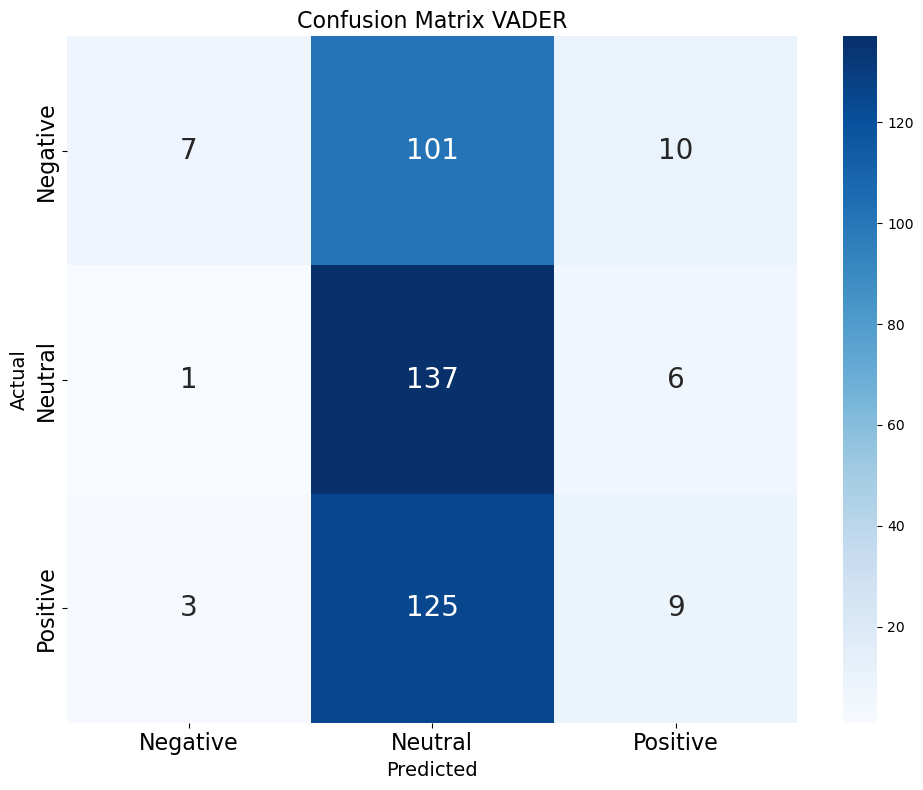

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data1['Validasi'] contains true labels and data1['Sentiment_Bert'] contains predicted labels
y_true3 = data3['Validasi']
y_pred3 = data3['Sentiment_Vader']

# Calculate confusion matrix
cm3 = confusion_matrix(y_true3, y_pred3)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))  # Set larger figure size for better visibility
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'], annot_kws={'size': 20})
plt.title('Confusion Matrix VADER', fontsize=16)  # Increase title font size
plt.xlabel('Predicted', fontsize=14)  # Increase x-axis label font size
plt.ylabel('Actual', fontsize=14)  # Increase y-axis label font size
plt.xticks(fontsize=16)  # Increase x-axis tick font size
plt.yticks(fontsize=16)  # Increase y-axis tick font size
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('confusion_matrix_VADER.png', dpi=1500)  # Save the plot with higher resolution (1200 DPI)
plt.show()

## Sentiment Analysis Using BERT

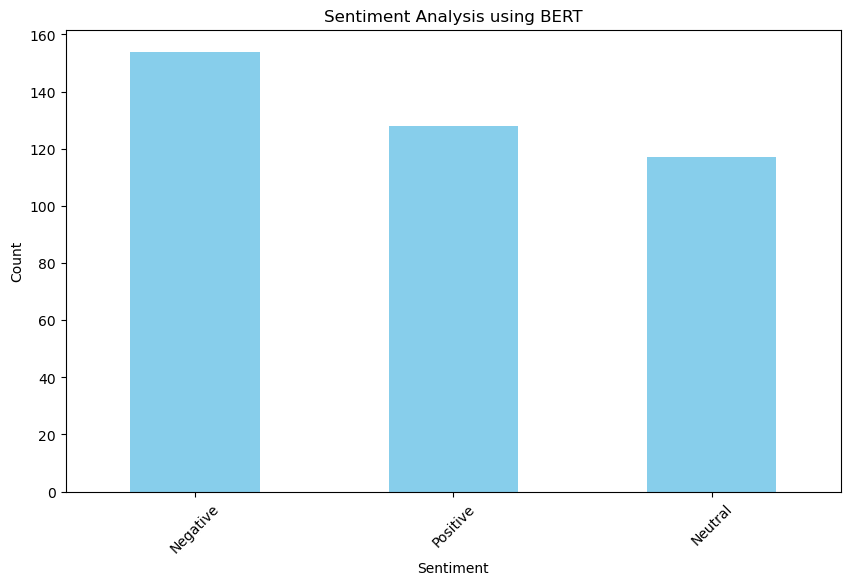

In [20]:
sentiment_counts = data1['Sentiment_Bert'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis using BERT')
plt.xticks(rotation=45)
plt.show()

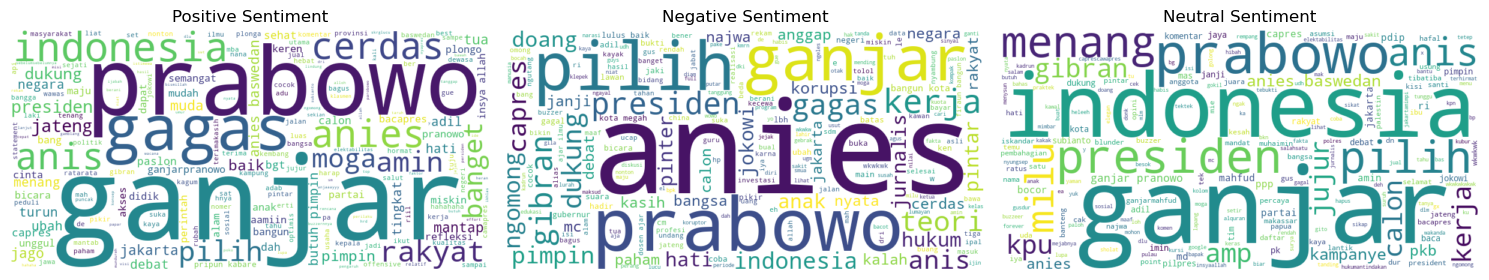

In [28]:
from wordcloud import WordCloud

# Filter data based on sentiment categories
positive_tokens = ' '.join(data1[data1['Sentiment_Bert'] == 'Positive']['Tidy_Stemmed_Tokens'])
negative_tokens = ' '.join(data1[data1['Sentiment_Bert'] == 'Negative']['Tidy_Stemmed_Tokens'])
neutral_tokens = ' '.join(data1[data1['Sentiment_Bert'] == 'Neutral']['Tidy_Stemmed_Tokens'])

# Generate word clouds for each sentiment category
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_tokens)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_tokens)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_tokens)

# Plotting word clouds for each sentiment category
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral Sentiment')
plt.axis('off')

plt.tight_layout()
plt.show()

## Sentiment Analysis Using Textblob

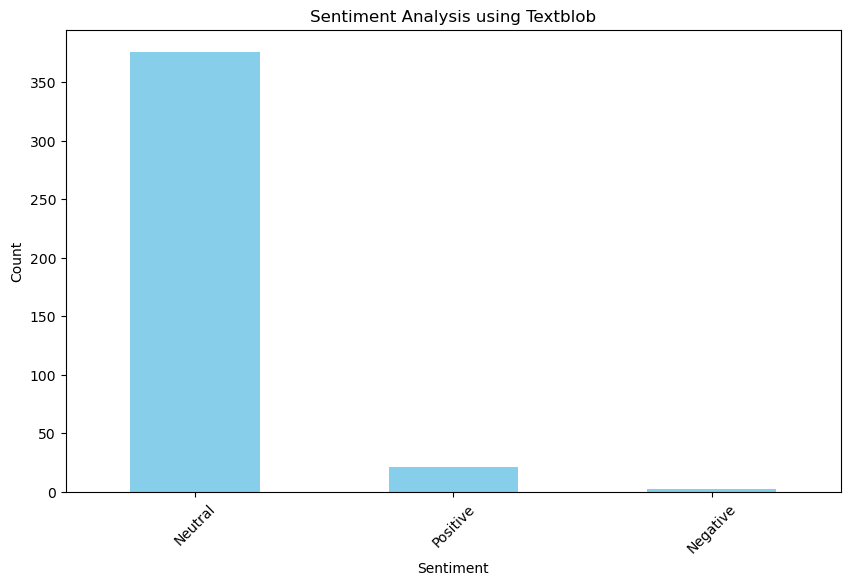

In [24]:
sentiment_counts = data2['Sentiment_TextBlob'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis using Textblob')
plt.xticks(rotation=45)
plt.show()

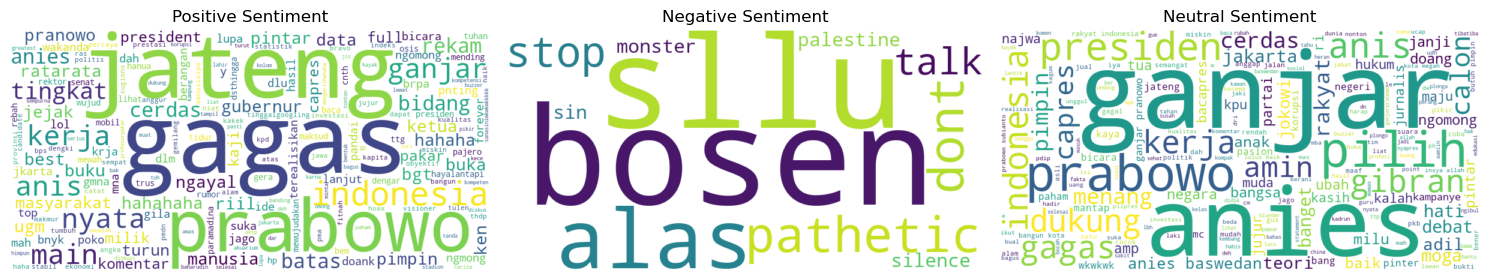

In [30]:
from wordcloud import WordCloud

# Filter data based on sentiment categories
positive_tokens = ' '.join(data1[data2['Sentiment_TextBlob'] == 'Positive']['Tidy_Stemmed_Tokens'])
negative_tokens = ' '.join(data1[data2['Sentiment_TextBlob'] == 'Negative']['Tidy_Stemmed_Tokens'])
neutral_tokens = ' '.join(data1[data2['Sentiment_TextBlob'] == 'Neutral']['Tidy_Stemmed_Tokens'])

# Generate word clouds for each sentiment category
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_tokens)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_tokens)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_tokens)

# Plotting word clouds for each sentiment category
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral Sentiment')
plt.axis('off')

plt.tight_layout()
plt.show()

## Sentiment Analysis Using VADER

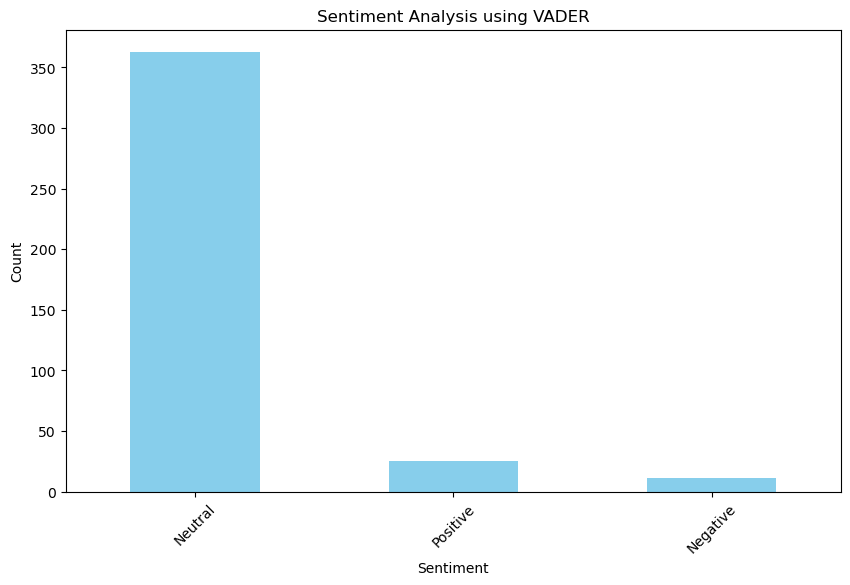

In [25]:
sentiment_counts = data3['Sentiment_Vader'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis using VADER')
plt.xticks(rotation=45)
plt.show()

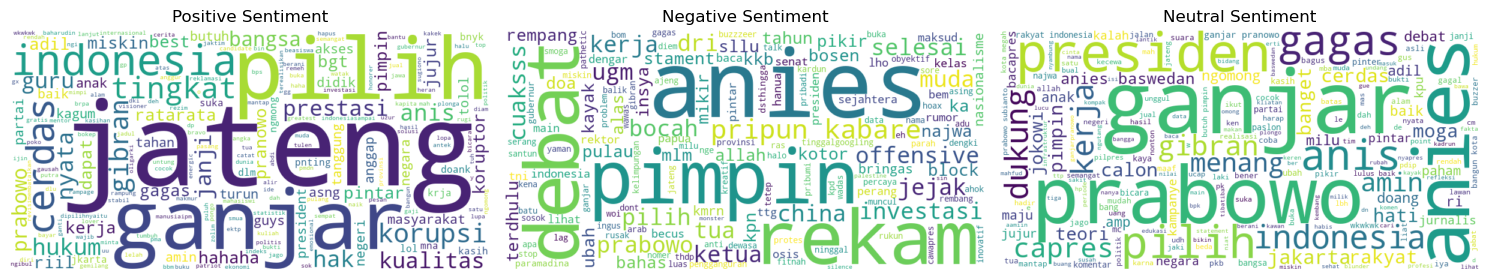

In [31]:
from wordcloud import WordCloud

# Filter data based on sentiment categories
positive_tokens = ' '.join(data1[data3['Sentiment_Vader'] == 'Positive']['Tidy_Stemmed_Tokens'])
negative_tokens = ' '.join(data1[data3['Sentiment_Vader'] == 'Negative']['Tidy_Stemmed_Tokens'])
neutral_tokens = ' '.join(data1[data3['Sentiment_Vader'] == 'Neutral']['Tidy_Stemmed_Tokens'])

# Generate word clouds for each sentiment category
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_tokens)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_tokens)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_tokens)

# Plotting word clouds for each sentiment category
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral Sentiment')
plt.axis('off')

plt.tight_layout()
plt.show()